$\textbf{INTERPOLATION OF SPECIES CONCENTRATION USING CHEBYCHEV INTERPOLATION}$

$\textbf{Reaction :}$ $H_2 + O_2 \rightarrow H_2O$
Interpolation for $H_20$


In [54]:
import numpy as np;
from scipy.linalg import solve_triangular
def true_function(x):
    ### This function is used to generate the underlying data
#     f = 16618.850520657*x**(4)-1296.1385823498*x**(3)+29.3221476932*x**(2)-0.0023083596*x-0.000301239
#     f = np.exp(-100*x**2)*(1+np.sign(x))/2+0.5*np.exp(-np.abs(2*x))*(1-np.sign(x))/2+0.5/(1+np.abs(2*x))*(1-np.sign(x))/2;
#     f= 1.0/(1+25*x*x);
    return f;

N = 10; # Number of data points
# x = np.linspace(0,0.035,N)
x = [0.0036318408,0.0066169154,0.0108706468,0.0133084577,0.0156218905,0.0179850746,0.0202985075,0.0227860697,0.0251492537,0.0298756219]; # Location of the data points
f = [0.000014322,0.0006283582,0.001732296,0.0022822695,0.002857722,0.0033693659,0.0037320525,0.0039969408,0.0042149677,0.0044808087]; # Value at the data points
# f = true_function(x);
# for i in range (0,10):
#     y1 = np.cos(np.pi*x[i])
#     print(y1)
e = 0.001*np.ones(N); # Error at the data points

In [55]:
import matplotlib.pyplot as plt;
plt.plot(x,f,'-', label='Species conc');
plt.legend();
plt.show()

In [56]:
def Lagrange_Poly(x,xnodes,i):
    ### Evaluates the i^{th} Lagrange polynomial at 'x' using 'xnodes'
    f=1;
    nnodes = np.size(xnodes);
    for k in np.arange(0,i):
        f=f*(x-xnodes[k])/(xnodes[i]-xnodes[k]);
    for k in np.arange(i+1,nnodes):
        f=f*(x-xnodes[k])/(xnodes[i]-xnodes[k]);
    return f;

In [57]:
def Lagrange(x,xnodes,fnodes):
    ### Evaluates the Lagrange interpolant using 'xnodes' and 'fnodes' at the location 'x'
    nnodes = np.size(xnodes);
    n          = np.size(x);
    interp    = np.zeros(n);
    for k in np.arange(0,nnodes):
        interp = interp + fnodes[k]*Lagrange_Poly(x,xnodes,k);
    return interp;

In [58]:
error = np.ones(N);
diff = error -e;
m = 3; # Initial number of Chebyshev nodes
while(np.max(diff)>0):
    y = np.cos(np.pi*np.linspace(0,0.035,m));
    A = np.zeros((N,m));
    for k in np.arange(0,m):
        A[:,k] = Lagrange_Poly(x,y,k);
    Q, R = np.linalg.qr(A);
    g = solve_triangular(R,Q.transpose().dot(f),lower=False);
    interp = Lagrange(x,y,g);
    error = np.abs(interp-f);
    diff = error - e;
    m = m+1;

In [59]:
# Number of samples for accurate representation
m


4

<IPython.core.display.Javascript object>


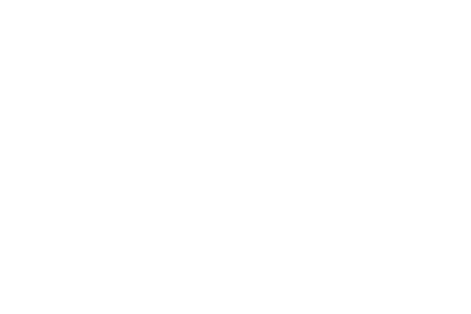

In [60]:
# Plot of the interpolant
fig = plt.figure()
plt.plot(x,interp,'.',label = 'Chebyshev interpolation')
plt.plot(x,f,'-',label ='Species conc')
plt.legend();
plt.show()

# print(interp)
# z = np.cos(np.pi*np.linspace(0,0.035,4));
# import math
# for i in range (0,4):
#     a = math.acos(z[i])/np.pi
#     print(a)

$\textbf{Code for solving non-linear equations with inequality constraines}$

In [61]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import fsolve

$\textbf{Reaction 1: $O + N_2O \rightarrow NO +NO$,}$

$\overline{\alpha} = 32.134$

n = N/A

$\epsilon/K$ = 13930

2000 K : 0.2;

4000 K : 0.3;

1000 K : 0.4;

\begin{align}
F(T) = M\sqrt{\sigma_{\alpha}^2 + \sigma_{\epsilon}^2*T^{-2} - 2*r_{\alpha \epsilon} \sigma_{\alpha} \sigma_{\epsilon}T^{-1}}
\end{align}

In [62]:
def function(z1):    
    Sa = z1[0];
    Se = z1[1];
    Rae = z1[2];
    M = 3/(np.log(10));
#     M = 1
    y = np.array([0.2,0.3,0.4]);
    T = np.array([2000,4000,1000]);
    f = np.zeros(3);
    f[0] = (y[0]/M)**2 - (Sa**2+(Se/T[0])**(2)-2*Rae*Sa*Se/T[0])
    f[1] = (y[1]/M)**2 - (Sa**2+(Se/T[1])**(2)-2*Rae*Sa*Se/T[1])
    f[2] = (y[2]/M)**2 - (Sa**2+(Se/T[2])**(2)-2*Rae*Sa*Se/T[2])
    return f;
zGuess1 =np.array([0.8,900,0.5])
z1 = fsolve(function,zGuess1);

In [63]:
print(z1)

[3.54506166e-01 5.87881970e+02 9.04534034e-01]


<IPython.core.display.Javascript object>


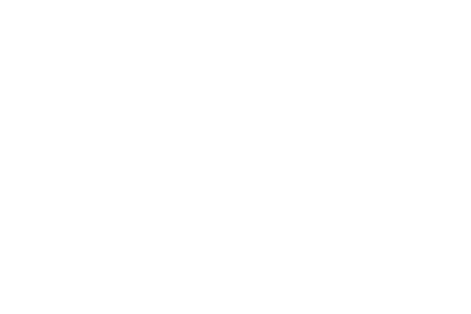

In [64]:
%matplotlib notebook
Tu = [1000,2000,4000];
fu = [0.4,0.2,0.3];
T = np.linspace(1000,4000,1000);
M = 3/(np.log(10));
Sa = z1[0]
Se = z1[1]
Rae = z1[2]
f= M*np.sqrt(Sa**2+(Se/T)**(2)-2*Rae*Sa*Se/T)
Sk = np.sqrt(Sa**2+(Se/T)**(2)-2*Rae*Sa*Se/T);
alpha = 32.134
n = 0
epsilon = 13930
N = 1000
k = alpha + n*np.log(T)-epsilon*(1/T)
Rae_x = 1
fx_1 = M*np.sqrt(Sa**2+(Se/T)**(2)-2*Rae_x*Sa*Se/T)
%matplotlib notebook
fig = plt.figure(1)
plt.plot(T,f,'-')
plt.plot(Tu,fu,'o');
plt.plot(T,fx_1,'--');
plt.ylim(0,0.5)
plt.show()

<IPython.core.display.Javascript object>


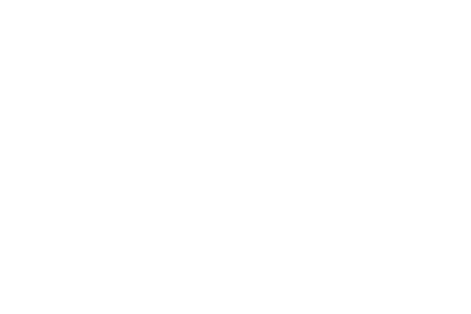

<IPython.core.display.Javascript object>


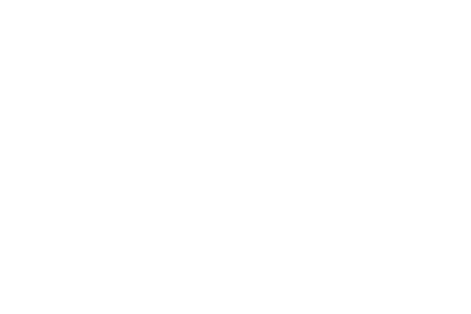

1000 1000 1000 1000


<IPython.core.display.Javascript object>


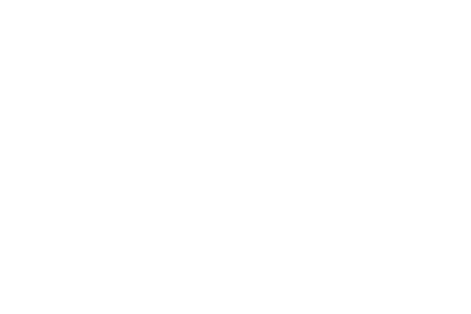

In [65]:
%matplotlib notebook
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.figure(2)
plt.plot((1/T),k)
plt.plot((1/T),np.log(10)*f+k)
plt.plot((1/T),k-np.log(10)*f)
s = sp.zeros((N,N));
x = sp.zeros((N,N));
dT = (4000-1000)/1000;

y = np.linspace(k[0]+np.log(10)*f[0], k[0]-np.log(10)*f[0], 1000)
x[0,:] = y
w = stats.norm.pdf(y,k[0],f[0])
s[0,:] = w
# plt.plot(x,w)
# plt.show()
fig = plt.figure(3)
# plt.plot(x,w)
# print(k)
for i in range (0,N):
    y = np.linspace(k[i]+np.log(10)*f[i], k[i]-np.log(10)*f[i],N);
    x[i,:] = y
    w = stats.norm.pdf(y,k[i], f[i])
    s[i,:] = w;   
    # print(T_data)
ax = fig.add_subplot(111, projection='3d');
A, E = np.meshgrid(1/T,k,sparse=False, indexing='ij')
# rv = univariate_normal([mu_x], [variance_x])
ax = fig.gca(projection='3d')
print(len(E),len(A),len(s),len(1/T))
ax.plot_surface(A,x,s,cmap='nipy_spectral',linewidth=0)

cset = ax.contour(A, x, s, zdir='A',offset=-90, cmap=cm.nipy_spectral)
cset = ax.contour(A, x, s, zdir='x', offset=-90, cmap=cm.nipy_spectral)
cset = ax.contour(A, x, s, zdir='s', offset=-90, cmap=cm.nipy_spectral)
fig = plt.figure(4)
plt.contourf(A,x,s,cmap='nipy_spectral')
# set_zlabel('Pdf(alpha,epsilon)',fontsize=14,linespacing=13.2)
plt.show()
# fig = plt.figure(5)
# plt.plot(1/T_data,k,s)

<IPython.core.display.Javascript object>


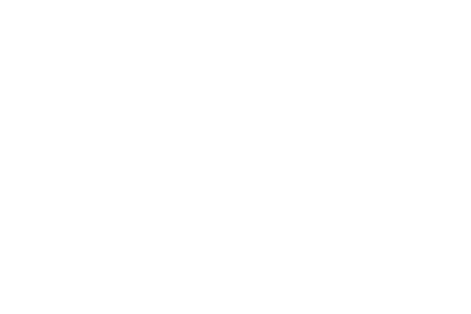

<IPython.core.display.Javascript object>


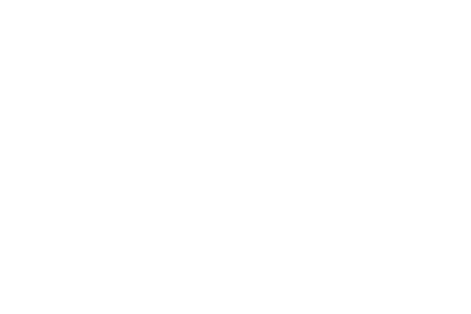

In [66]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Parameters to set
mu_x = 32.134
variance_x = 0.355*0.355

mu_y = 13930
variance_y = 588*588

#Create grid and multivariate normal
alpha = np.linspace(31,33,1000)
epsilon = np.linspace(12000,16000,1000)
A, E = np.meshgrid(alpha,epsilon)
pos = np.empty(A.shape + (2,))
pos[:, :, 0] = A; pos[:, :, 1] = E
rv = multivariate_normal([mu_x, mu_y], [[variance_x,0.9045*0.355*588 ], [0.9045*0.355*588, variance_y]])
%matplotlib notebook
#Make a 3D plot
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d');
ax = fig.gca(projection='3d')
ax.plot_surface(A, E, rv.pdf(pos),cmap='nipy_spectral',linewidth=0)
cset = ax.contour(A, E, rv.pdf(pos), zdir='A',offset=-90, cmap=cm.nipy_spectral)
cset = ax.contour(A, E, rv.pdf(pos), zdir='E', offset=-90, cmap=cm.nipy_spectral)
cset = ax.contour(A, E, rv.pdf(pos), zdir='rv.pdf(pos)', offset=-90, cmap=cm.nipy_spectral)
# ax.plot_wireframe(A, E, rv.pdf(pos), rstride=25, cstride=25)
ax.view_init(30,100)
# xLabel = axes.set_xlabel('X', fontsize=14, fontweight='bold', color='b')
# yLabel = axes.set_ylabel('Y',fontsize=14, fontweight='bold', color='r')
# zLabel = axes.set_zlabel('Z',fontsize=14, fontweight='bold', color='g')
ax.set_xlabel('Alpha',fontsize=14,linespacing=3.2)
ax.set_ylabel('Epsilon',fontsize=14,linespacing=3.2)
ax.set_zlabel('Pdf(alpha,epsilon)',fontsize=14,linespacing=13.2)
ax.set_zticks([0,0.0004,0.0008,0.0012,0.0016])
plt.figure(2)
plt.contourf(A, E, rv.pdf(pos),cmap='nipy_spectral')
plt.show()

$\textbf{Reaction 2: $N + OH \rightarrow NO + H$,}$

$\overline{\alpha} = 32.317$

n = -0.2

$\epsilon/K$ = N/A

300 K : 0.1;

100 K : 0.3;

2500 K : 0.4;
    
\begin{align}
F(T) = M\sqrt{\sigma_{\alpha}^2 + \sigma_{n}^2*(ln(T))^{2} + 2*r_{\alpha n } \sigma_{\alpha} \sigma_{n}*ln(T)}
\end{align}
    

In [67]:
def function(z):    
    Sa = z[0];
    Sn = z[1];
    Ran = z[2];
    M = 3/(np.log(10));
#     M = 1
    y = np.array([0.1,0.3,0.4]);
    T = np.array([300,100,2500]);
    f = np.zeros(3);
    f[0] = (y[0]/M)**2 - (Sa**2+(Sn*np.log(T[0]))**2+2*Ran*Sa*Sn*np.log(T[0]))
    f[1] = (y[1]/M)**2 - (Sa**2+(Sn*np.log(T[1]))**2+2*Ran*Sa*Sn*np.log(T[1]))
    f[2] = (y[2]/M)**2 - (Sa**2+(Sn*np.log(T[2]))**2+2*Ran*Sa*Sn*np.log(T[2]))
    return f;
zGuess =np.array([1,0.1,-1])
z = fsolve(function,zGuess);
print(z)

[ 0.96990622  0.16209391 -0.99786241]


<IPython.core.display.Javascript object>


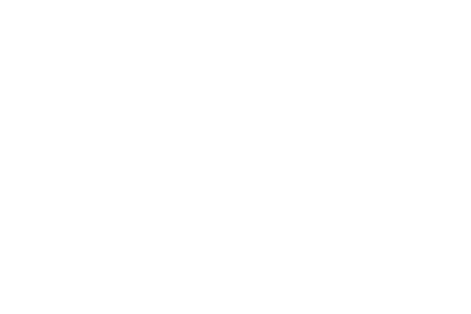

<IPython.core.display.Javascript object>


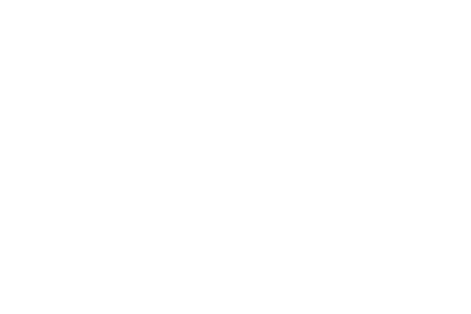

In [68]:
%matplotlib notebook
Tu2 = [300,100,2500];
fu2 = [0.1,0.3,0.4];
T2 = np.linspace(100,2500,1000);
M = 3/(np.log(10));
Sa = z[0]
Sn = z[1]
Ran = z[2]
f2= M*np.sqrt(Sa**2+(Sn*np.log(T2))**2+2*Ran*Sa*Sn*np.log(T2))
Ran_fixed = -1
fx2= M*np.sqrt(Sa**2+(Sn*np.log(T2))**2+2*Ran_fixed*Sa*Sn*np.log(T2))
fig = plt.figure(1)
plt.plot(T2,f2,'-')
plt.plot(Tu2,fu2,'o');
plt.plot(T2,fx2,'--');
plt.ylim(0,0.41)
plt.show()
alpha = 32.317
n = -0.2
epsilon = 0
N = 1000
T2 = sp.linspace(100,2500,N);
k2 = alpha + n*np.log(T2)-epsilon*(1/T2)
# print(f[1],k[1])
# print(f[1]*k[1])
# print(k[1]/f[1])
fig = plt.figure(2)
plt.plot((1/T2),k2)
plt.plot((1/T2),np.log(10)*f2+k2)
plt.plot((1/T2),k2-np.log(10)*f2)
plt.show()

<IPython.core.display.Javascript object>


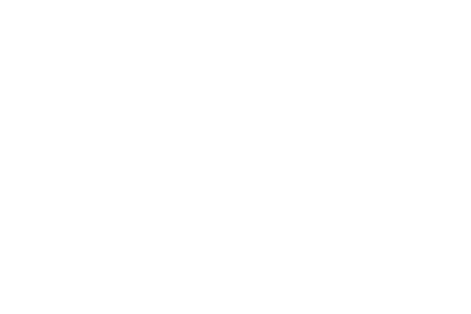

<IPython.core.display.Javascript object>


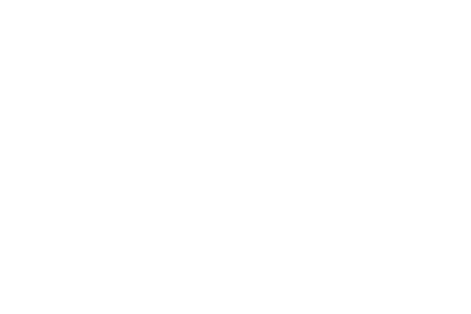

<IPython.core.display.Javascript object>


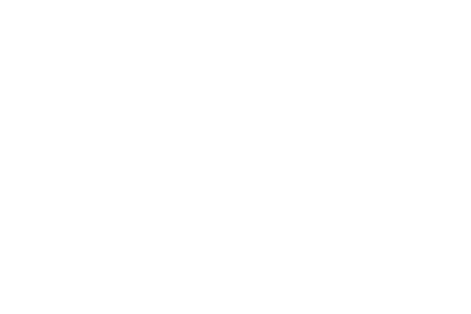

In [69]:
%matplotlib notebook
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.figure(1)
plt.plot((1/T2),k2)
# print(k[0],f[0],Sk[0])
plt.plot((1/T2),np.log(10)*f2+k2)
plt.plot((1/T2),k2-np.log(10)*f2)
s2 = sp.zeros((N,N));
x2 = sp.zeros((N,N));
dT = (4000-1000)/1000;

y2 = np.linspace(k2[0]+np.log(10)*f2[0], k2[0]-np.log(10)*f2[0], 1000)
x2[0,:] = y2
w2 = stats.norm.pdf(y2, k2[0],f2[0])
s2[0,:] = w2
for i in range (0,N):
    y2 = np.linspace(k2[i]+np.log(10)*f2[i], k2[i]-np.log(10)*f2[i],N);
    x2[i,:] = y2
    w2 = stats.norm.pdf(y2,k2[i], f2[i])
    s2[i,:] = w2;   

fig = plt.figure(2)
ax = fig.add_subplot(111, projection='3d');
A2, E = np.meshgrid(1/T2,k2,sparse=False, indexing='ij')
ax = fig.gca(projection='3d')
ax.plot_surface(A2,x2,s2,cmap='nipy_spectral',linewidth=0)
fig = plt.figure(3)
plt.contourf(A2,x2,s2,cmap='nipy_spectral')
plt.show()


<IPython.core.display.Javascript object>


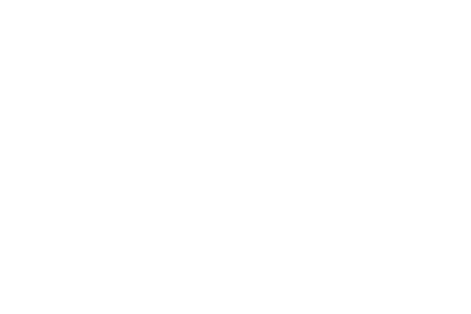

<IPython.core.display.Javascript object>


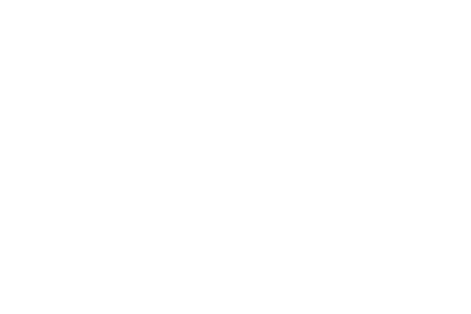

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Parameters to set
mu_x = 32.317
variance_x = 0.970*0.970

mu_y = -0.2
variance_y = 0.162*0.162

#Create grid and multivariate normal
alpha = np.linspace(30,35,1000)
n = np.linspace(-.6,.2,1000)
A2, E2 = np.meshgrid(alpha,n)
pos = np.empty(A2.shape + (2,))
pos[:, :, 0] = A2; pos[:, :, 1] = E2
rv2 = multivariate_normal([mu_x, mu_y], [[variance_x,-0.9979*0.970*0.162 ], [-0.9979*0.970*0.162, variance_y]])
%matplotlib notebook
#Make a 3D plot
fig = plt.figure(1)
ax = fig.add_subplot(111, projection='3d');
ax = fig.gca(projection='3d')
ax.plot_surface(A2, E2, rv2.pdf(pos),cmap='nipy_spectral',linewidth=0)
# cset = ax.contour(A2, E2, rv2.pdf(pos), zdir='A2',offset=-90, cmap=cm.nipy_spectral)
# cset = ax.contour(A2, E2, rv2.pdf(pos), zdir='E2', offset=-90, cmap=cm.nipy_spectral)
# cset = ax.contour(A2, E2, rv2.pdf(pos), zdir='rv2.pdf(pos)', offset=-90, cmap=cm.nipy_spectral)
# ax.plot_wireframe(A, E, rv.pdf(pos), rstride=25, cstride=25)
ax.view_init(30,100)
# xLabel = axes.set_xlabel('X', fontsize=14, fontweight='bold', color='b')
# yLabel = axes.set_ylabel('Y',fontsize=14, fontweight='bold', color='r')
# zLabel = axes.set_zlabel('Z',fontsize=14, fontweight='bold', color='g')
ax.set_xlabel('Alpha',fontsize=14,linespacing=3.2)
ax.set_ylabel('n',fontsize=14,linespacing=3.2)
ax.set_zlabel('g_2',fontsize=14,linespacing=13.2)
ax.set_zticks([0,2,4,6,8,10,12,14])
plt.figure(2)
plt.contourf(A2, E2, rv2.pdf(pos),cmap='nipy_spectral')
plt.show()

$\textbf{Reaction 3: $HO_2 + C_3H_5 \rightarrow C_3H_6 + O_2$,}$

$\overline{\alpha} = 28.605$

n = N/A

$\epsilon/K$ = N/A

800 K : 0.3;

900 K : 0.4;

1000 K : 0.5;
    
$\textbf{CASE 1}$
\begin{align}
F(T) = M\sqrt{\sigma_{\alpha}^2 + \sigma_{n}^2*(ln(T))^{2} + 2*r_{\alpha n } \sigma_{\alpha} \sigma_{n}*ln(T)}
\end{align}
$\textbf{CASE 2}$
\begin{align}
F(T) = M\sqrt{\sigma_{\alpha}^2 + \sigma_{\epsilon}^2*T^{-2} - 2*r_{\alpha \epsilon} \sigma_{\alpha} \sigma_{\epsilon}T^{-1}}
\end{align}
    

In [71]:
def function(z3a):    
    Sa = z3a[0];
    Sn = z3a[1];
    Ran = z3a[2];
    M = 3/(np.log(10));
#     M = 1
    y = np.array([0.3,0.3,0.5]);
    T = np.array([600,800,1000]);
    f = np.zeros(3);
    f[0] = (y[0]/M)**2 - (Sa**2+(Sn*np.log(T[0]))**2+2*Ran*Sa*Sn*np.log(T[0]))
    f[1] = (y[1]/M)**2 - (Sa**2+(Sn*np.log(T[1]))**2+2*Ran*Sa*Sn*np.log(T[1]))
    f[2] = (y[2]/M)**2 - (Sa**2+(Sn*np.log(T[2]))**2+2*Ran*Sa*Sn*np.log(T[2]))
    return f;
zGuess3a =np.array([3,0.5,0])
z3a = fsolve(function,zGuess3a);
print(z3a)

[ 5.95079728  0.90933921 -0.99949284]


In [72]:
def function(z3b):    
    Sa = z3b[0];
    Se = z3b[1];
    Rae = z3b[2];
    M = 3/(np.log(10));
#     M = 1
    y = np.array([0.3,0.3,0.5]);
    T = np.array([600,800,1000]);
    f = np.zeros(3);
    f[0] = (y[0]/M)**2 - (Sa**2+(Se/T[0])**(2)-2*Rae*Sa*Se/T[0])
    f[1] = (y[1]/M)**2 - (Sa**2+(Se/T[1])**(2)-2*Rae*Sa*Se/T[1])
    f[2] = (y[2]/M)**2 - (Sa**2+(Se/T[2])**(2)-2*Rae*Sa*Se/T[2])
    return f;
zGuess3b =np.array([1,900,0.5])
z3b = fsolve(function,zGuess3b);
print(z3b)

[  1.10960288 752.02114229   0.98836937]


<IPython.core.display.Javascript object>


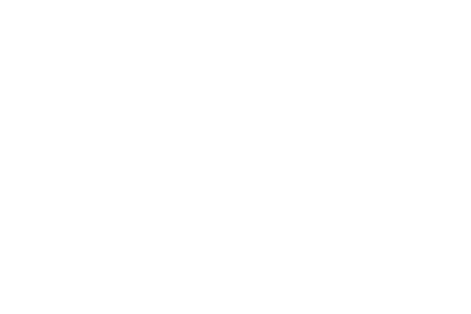

<IPython.core.display.Javascript object>


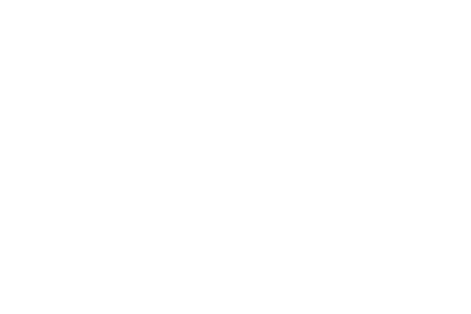

In [73]:
%matplotlib notebook
Tu3 = [600,700,800,1000];
fu3 = [0.3,0.3,0.3,0.5];
T3 = np.linspace(600,1000,1000);
M = 3/(np.log(10));
Sa = z3b[0]
Se = z3b[1]
Rae = z3b[2]
Sa3a = z3a[0]
Sn3a = z3a[1]
Ran3a = z3a[2]
Rae_x3 = -1
f3a= M*np.sqrt(Sa3a**2+(Sn3a*np.log(T3))**2+2*Ran3a*Sa3a*Sn3a*np.log(T3))
fx3a= M*np.sqrt(Sa3a**2+(Sn3a*np.log(T3))**2+2*Ran3a*Sa3a*Sn3a*np.log(T3))
f3b= M*np.sqrt(Sa**2+(Se/T3)**(2)-2*Rae*Sa*Se/T3)
fx3b= M*np.sqrt(Sa**2+(Se/T3)**(2)-2*Rae_x3*Sa*Se/T3)
fig = plt.figure(1)
plt.plot(T3,f3a,'-')
plt.plot(T3,f3b,'--');
plt.plot(Tu3,fu3,'o');
# plt.plot(T3,fx3,'--');
plt.ylim(0,0.6)
plt.show()
alpha = 28.605
n = 0
epsilon = 0
N = 1000
T3 = sp.linspace(600,1000,N);
k3 = alpha + n*np.log(T3)-epsilon*(1/T3)
# print(f[1],k[1])
# print(f[1]*k[1])
# print(k[1]/f[1])
fig = plt.figure(2)
plt.plot((1/T3),k3)
plt.plot((1/T3),np.log(10)*f3b+k3,'--')
plt.plot((1/T3),k3-np.log(10)*f3b,'--')
plt.plot((1/T3),k3)
plt.plot((1/T3),np.log(10)*f3a+k3,'-')
plt.plot((1/T3),k3-np.log(10)*f3a,'-')
plt.show()

<IPython.core.display.Javascript object>


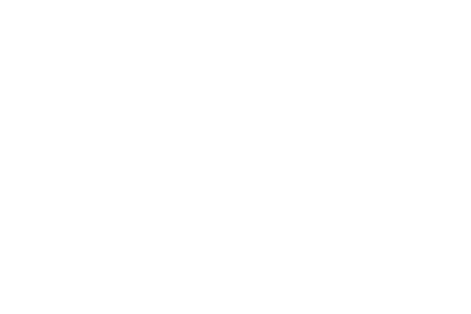

<IPython.core.display.Javascript object>


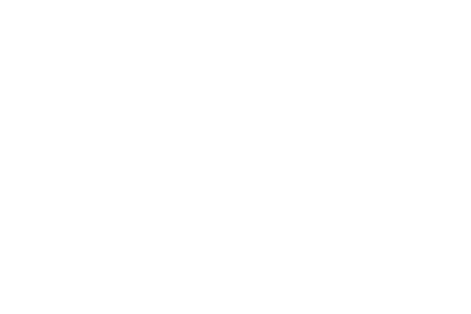

In [74]:
%matplotlib notebook
import numpy as np
import scipy as sp
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
s3 = sp.zeros((N,N));
x3 = sp.zeros((N,N));
dT = (4000-1000)/1000;
y3 = np.linspace(k3[0]+np.log(10)*f3a[0], k3[0]-np.log(10)*f3a[0], 1000)
x3[0,:] = y3
w3 = stats.norm.pdf(y3, k3[0],f3a[0])
s3[0,:] = w3
for i in range (0,N):
    y3 = np.linspace(k3[i]+np.log(10)*f3a[i], k3[i]-np.log(10)*f3a[i],N);
    x3[i,:] = y3
    w3 = stats.norm.pdf(y3,k3[i], f3a[i])
    s3[i,:] = w3;   
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d');
A3, E = np.meshgrid(1/T3,k3,sparse=False, indexing='ij')
ax = fig.gca(projection='3d')
ax.plot_surface(A3,x3,s3,cmap='nipy_spectral',linewidth=0)
fig = plt.figure(4)
plt.contourf(A3,x3,s3,cmap='nipy_spectral')
plt.show()

<IPython.core.display.Javascript object>


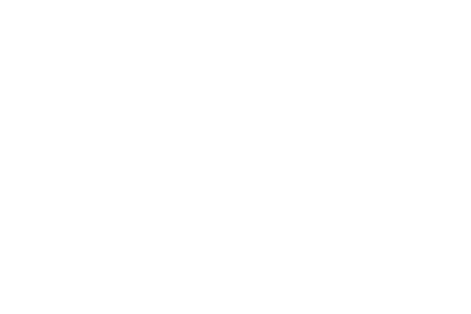

<IPython.core.display.Javascript object>


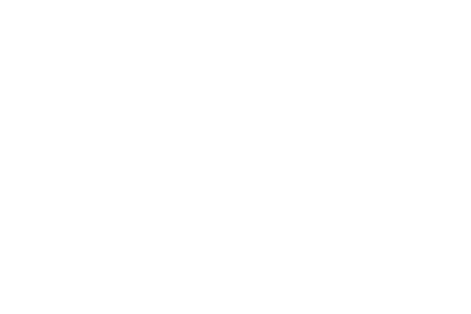

In [75]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Parameters to set
mu_x = 28.605
variance_x = 1.110*1.110
# epsilon
mu_y = 0
variance_y = 752*752

#Create grid and multivariate normal
alpha = np.linspace(24,32,1000)
epsilon = np.linspace(-1600,1600,1000)
A3, E3 = np.meshgrid(alpha,epsilon)
pos = np.empty(A3.shape + (2,))
pos[:, :, 0] = A3; pos[:, :, 1] = E3
rv3 = multivariate_normal([mu_x, mu_y], [[variance_x,0.9884*1.11*752 ], [0.9884*1.11*752, variance_y]])
%matplotlib notebook
#Make a 3D plot
fig = plt.figure(5)
ax = fig.add_subplot(111, projection='3d');
ax = fig.gca(projection='3d')
ax.plot_surface(A3, E3, rv3.pdf(pos),cmap='nipy_spectral',linewidth=0)
# cset = ax.contour(A2, E2, rv2.pdf(pos), zdir='A2',offset=-90, cmap=cm.nipy_spectral)
# cset = ax.contour(A2, E2, rv2.pdf(pos), zdir='E2', offset=-90, cmap=cm.nipy_spectral)
# cset = ax.contour(A2, E2, rv2.pdf(pos), zdir='rv2.pdf(pos)', offset=-90, cmap=cm.nipy_spectral)
# ax.plot_wireframe(A, E, rv.pdf(pos), rstride=25, cstride=25)
ax.view_init(30,100)
# xLabel = axes.set_xlabel('X', fontsize=14, fontweight='bold', color='b')
# yLabel = axes.set_ylabel('Y',fontsize=14, fontweight='bold', color='r')
# zLabel = axes.set_zlabel('Z',fontsize=14, fontweight='bold', color='g')
ax.set_xlabel('Alpha',fontsize=14,linespacing=3.2)
ax.set_ylabel('epsilon',fontsize=14,linespacing=3.2)
ax.set_zlabel('g_2',fontsize=14,linespacing=13.2)
ax.set_zticks([0,0.0004,0.0008,0.0012])
plt.figure(6)
plt.contourf(A3, E3, rv3.pdf(pos),cmap='nipy_spectral')
plt.show()

<IPython.core.display.Javascript object>


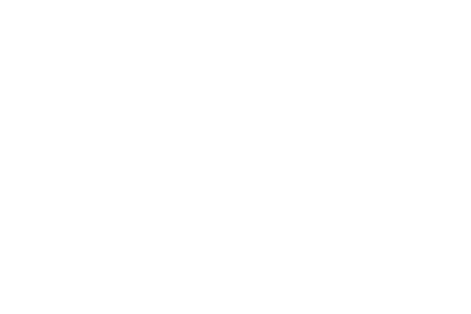

<IPython.core.display.Javascript object>


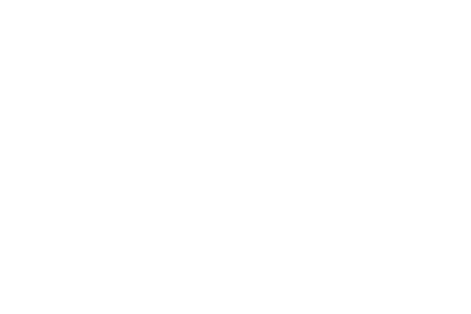

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
#Parameters to set
mu_x = 28.605
variance_x = 5.951*5.951
# n
mu_y = 0
variance_y = 0.909*0.909

#Create grid and multivariate normal
alpha = np.linspace(5,50,1000)
epsilon = np.linspace(-2,2,1000)
A3, E3 = np.meshgrid(alpha,epsilon)
pos = np.empty(A3.shape + (2,))
pos[:, :, 0] = A3; pos[:, :, 1] = E3
rv3 = multivariate_normal([mu_x, mu_y], [[variance_x,-0.99949*0.909*5.951 ], [-0.99949*0.909*5.951 , variance_y]])
%matplotlib notebook
#Make a 3D plot
fig = plt.figure(5)
ax = fig.add_subplot(111, projection='3d');
ax = fig.gca(projection='3d')
ax.plot_surface(A3, E3, rv3.pdf(pos),cmap='nipy_spectral',linewidth=0)
# cset = ax.contour(A2, E2, rv2.pdf(pos), zdir='A2',offset=-90, cmap=cm.nipy_spectral)
# cset = ax.contour(A2, E2, rv2.pdf(pos), zdir='E2', offset=-90, cmap=cm.nipy_spectral)
# cset = ax.contour(A2, E2, rv2.pdf(pos), zdir='rv2.pdf(pos)', offset=-90, cmap=cm.nipy_spectral)
# ax.plot_wireframe(A, E, rv.pdf(pos), rstride=25, cstride=25)
ax.view_init(30,100)
# xLabel = axes.set_xlabel('X', fontsize=14, fontweight='bold', color='b')
# yLabel = axes.set_ylabel('Y',fontsize=14, fontweight='bold', color='r')
# zLabel = axes.set_zlabel('Z',fontsize=14, fontweight='bold', color='g')
ax.set_xlabel('Alpha',fontsize=14,linespacing=3.2)
ax.set_ylabel('epsilon',fontsize=14,linespacing=3.2)
ax.set_zlabel('g_2',fontsize=14,linespacing=13.2)
# ax.set_zticks([0,0.0004,0.0008,0.0012])
plt.figure(6)
plt.contourf(A3, E3, rv3.pdf(pos),cmap='nipy_spectral')
plt.show()

$\textbf{Reaction 4: $O + C_2H_4 \rightarrow products$}$

$\overline{\alpha} = 16.422$

n = 1.88

$\epsilon/K$ = 92

300-1000 K : 0.1;

220 K : 0.3;

2000 K : 0.3;
    
$\textbf{CASE 1}$
\begin{align}
F(T) = M\sqrt{\sigma_{\alpha}^2 + \sigma_{n}^2*(ln(T))^{2} + 2*r_{\alpha n } \sigma_{\alpha} \sigma_{n}*ln(T)+ \sigma_{\epsilon}^2*T^{-2} - 2*r_{\alpha \epsilon} \sigma_{\alpha} \sigma_{\epsilon}T^{-1}-2*r_{\epsilon n } \sigma_{\epsilon} \sigma_{n}*ln(T)*T^{-1}}
\end{align}


Plot from the paper "Uncertainity Quantification from Arrhenius Parameter"

In [77]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [78]:
#z4 = [Sa.Sn,Se,Ran,Rne,Rae]

In [79]:
def Objective (z4):
    M = 3/(np.log(10));
    f = np.zeros(10)
    y = np.array([0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3]);
    T = np.array([220,300,400,500,600,700,800,900,1000,2000]);
    f = (y) - M*np.sqrt((z4[0]**2+(z4[1]*np.log(T))**2+(z4[2]/T)**(2)+2*z4[3]*z4[0]*z4[1]*np.log(T)-2*z4[5]*z4[0]*z4[2]/T-2*z4[4]*z4[2]*z4[1]*np.log(T)/T))
    obj = np.dot(f,f);
    return obj
def cons1(z4):
    return (z4[0]*z4[1]*z4[2])**2*(1-z4[3]**2-z4[4]**2-z4[5]**2+2*z4[3]*z4[4]*z4[5])

In [80]:
z4 = np.array([5,1,500,0.5,-0.5,0.5])
# arr = np.array(func1(z4))
# objective = np.dot(arr,arr);
# objective = func1(z4);
print(Objective(z4));
# print(cons1(z4))

1679.3838440408404


In [81]:
d = (-1.0,1.0)
a = (1,4)
c = (0,1000)
b = (0.1,1)
# bnds = ([2,0,250,-1,-1,-1],[4,1,260,1,1,1])
bnds = (a,b,c,d,d,d)
con1 = {'type':'ineq','fun':cons1}
# con1 = {'type':'ineq','func':constraint7}
Cons = [con1];

In [82]:
sol4 = minimize(Objective,z4,method='SLSQP',bounds=bnds, constraints=Cons);

/home/krunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


In [83]:
print(sol)

     fun: 16.0
     jac: array([12.,  1.,  2., 11.])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([1., 5., 5., 1.])


In [84]:
print(Objective(sol4.x));

0.00033293149643091923


In [85]:
Exact_sol = [3.427,0.463,254,-0.99972,-0.99965,0.999996]
print(Objective(Exact_sol));

0.0003806742042378143


<IPython.core.display.Javascript object>


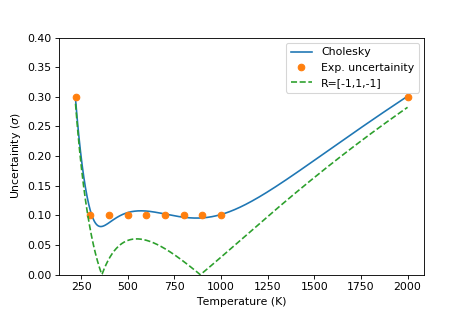

<IPython.core.display.Javascript object>


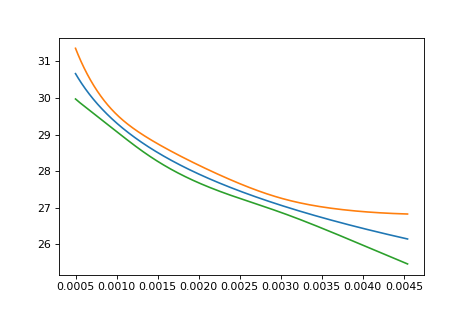

In [105]:
%matplotlib notebook
# sol.x = np.array([3.427,0.463,254,-0.99972,0.9999996,-0.99965])
Tu4 = [220,300,400,500,600,700,800,900,1000,2000];
fu4 = [0.3,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.3];
T4 = np.linspace(220,2000,1000);
M = 3/(np.log(10));
Sa = sol4.x[0];
Sn = sol4.x[1];
Se = sol4.x[2];
Ran =sol4.x[3];
Ren =sol4.x[4];
Rae =sol4.x[5];
f4= M*np.sqrt(Sa**2+(Sn*np.log(T4))**2+(Se/T4)**(2)+2*Ran*Sa*Sn*np.log(T4)-2*Rae*Sa*Se/T4-2*Ren*Se*Sn*np.log(T4)/T4)
Ran_fixed = -1
Rae_fixed = 1
Ren_fixed = -1
fx4= M*np.sqrt(Sa**2+(Sn*np.log(T4))**2+(Se/T4)**(2)+2*Ran_fixed*Sa*Sn*np.log(T4)-2*Rae_fixed*Sa*Se/T4-2*Ren_fixed*Se*Sn*np.log(T4)/T4)
fig = plt.figure(1)
plt.plot(T4,f4,'-',label='Cholesky')
plt.plot(Tu4,fu4,'o',label='Exp. uncertainity');
plt.plot(T4,fx4,'--',label='R=[-1,1,-1]');
plt.ylim(0,0.4)
plt.xlabel('Temperature (K)')
plt.ylabel('Uncertainity ($\sigma$)')
plt.legend()
plt.show()
alpha = 16.422
n = 1.88
epsilon = 92
N = 1000
T4 = sp.linspace(220,2000,N);
k4 = alpha + n*np.log(T4)-epsilon*(1/T4)
fig = plt.figure(2)
plt.plot((1/T4),k4)
plt.plot((1/T4),np.log(10)*f4+k4)
plt.plot((1/T4),k4-np.log(10)*f4)
plt.show()

<IPython.core.display.Javascript object>


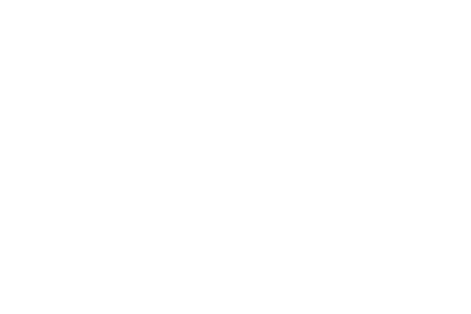

<IPython.core.display.Javascript object>


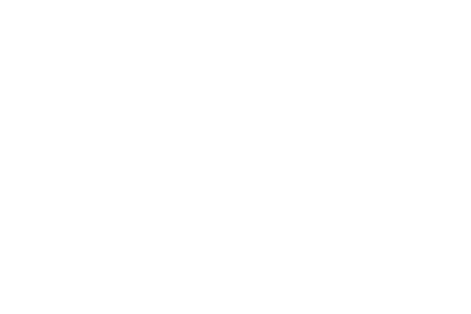

In [87]:
%matplotlib notebook
s4 = sp.zeros((N,N));
x4 = sp.zeros((N,N));
dT = (4000-1000)/1000;
y4 = np.linspace(k4[0]+np.log(10)*f4[0], k4[0]-np.log(10)*f4[0], 1000)
x4[0,:] = y4
w4 = stats.norm.pdf(y4, k4[0],f4[0])
s4[0,:] = w4
for i in range (0,N):
    y4 = np.linspace(k4[i]+np.log(10)*f4[i], k4[i]-np.log(10)*f4[i],N);
    x4[i,:] = y4
    w4 = stats.norm.pdf(y4,k4[i], f4[i])
    s4[i,:] = w4;   
fig = plt.figure(3)
ax = fig.add_subplot(111, projection='3d');
A4, E4 = np.meshgrid(1/T4,k4,sparse=False, indexing='ij')
ax = fig.gca(projection='3d')
ax.plot_surface(A4,x4,s4,cmap='nipy_spectral',linewidth=0)
fig = plt.figure(4)
plt.contourf(A4,x4,s4,cmap='nipy_spectral')
plt.show()

$\textbf{Reaction 5: $H + CH_3 \rightarrow H_2 + ^1CH_2$}$

$\overline{\alpha} = 37.076$

n = -0.56

$\epsilon/K$ = 1350

300-1000 K : 0.15;

1000-1700 K : 0.3;

1700-2500 K : 0.2;
    
$\textbf{CASE 1}$
\begin{align}
F(T) = M\sqrt{\sigma_{\alpha}^2 + \sigma_{n}^2*(ln(T))^{2} + 2*r_{\alpha n } \sigma_{\alpha} \sigma_{n}*ln(T)+ \sigma_{\epsilon}^2*T^{-2} - 2*r_{\alpha \epsilon} \sigma_{\alpha} \sigma_{\epsilon}T^{-1}-2*r_{\epsilon n } \sigma_{\epsilon} \sigma_{n}*ln(T)*T^{-1}}
\end{align}


$\textbf{Curve fitting:}$

In [88]:
import numpy as np
import scipy as sp
from scipy.optimize import minimize
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

In [89]:
def Objective_R5 (z5):
    M = 3/(np.log(10));
    f = np.zeros(10)
    y = np.array([0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2]);
    T = np.array([300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500]);
    f = (y) - M*np.sqrt((z5[0]**2+(z5[1]*np.log(T))**2+(z5[2]/T)**2+2*z5[3]*z5[0]*z5[1]*np.log(T)-2*z5[5]*z5[0]*z5[2]/T-2*z5[4]*z5[2]*z5[1]*np.log(T)/T))
    obj = np.dot(f,f);
    return obj
def cons1(z5):
    return (z5[0]*z5[1]*z5[2])**2*(1-z5[3]**2-z5[4]**2-z5[5]**2+2*z5[3]*z5[4]*z5[5])


In [90]:
z5 = np.array([2,0.1,100,0.5,-0.5,0.5])
print(Objective_R5(z5));

197.02593884563208


In [91]:
d = (-1.0,1.0)
a = (1,4)
c = (0,1000)
b = (0.01,1)
# bnds = ([2,0,250,-1,-1,-1],[4,1,260,1,1,1])
bnds = (a,b,c,d,d,d)
con1 = {'type':'ineq','fun':cons1}
# con1 = {'type':'ineq','func':constraint7}
Cons = [con1];

In [92]:
sol = minimize(Objective_R5,z4,method='SLSQP',bounds=bnds, constraints=Cons);

/home/krunal/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


In [93]:
print(sol.x)
print(Objective(sol.x));

[ 1.20364359e+00  1.25966273e-01  1.72418320e+02 -9.96433662e-01
 -9.27152124e-01  9.54068388e-01]
0.07397188978159158


In [94]:
R5_exact_sol = [1.177,0.121,172,-0.999992,-0.9806,0.9814]
print(Objective(R5_exact_sol));

0.07473118908642662


<IPython.core.display.Javascript object>


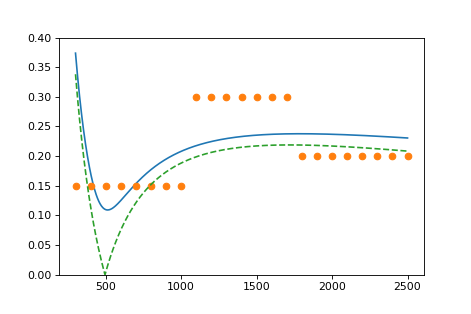

<IPython.core.display.Javascript object>


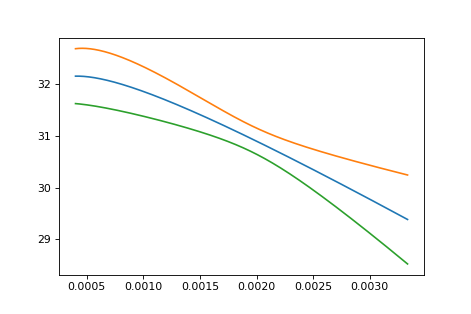

In [95]:
%matplotlib notebook
# sol.x = np.array([3.427,0.463,254,-0.99972,0.9999996,-0.99965])
Tu5 = [300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500,1600,1700,1800,1900,2000,2100,2200,2300,2400,2500];
fu5 = [0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.15,0.3,0.3,0.3,0.3,0.3,0.3,0.3,0.2,0.2,0.2,0.2,0.2,0.2,0.2,0.2];
T5 = np.linspace(300,2500,1000);
M = 3/(np.log(10));
Sa = sol.x[0];
Sn = sol.x[1];
Se = sol.x[2]
Ran =sol.x[3]
Ren =sol.x[4]
Rae =sol.x[5]
f5= M*np.sqrt(Sa**2+(Sn*np.log(T4))**2+(Se/T4)**(2)+2*Ran*Sa*Sn*np.log(T4)-2*Rae*Sa*Se/T4-2*Ren*Se*Sn*np.log(T4)/T4)
Ran_fixed = -1
Rae_fixed = 1
Ren_fixed = -1
fx5= M*np.sqrt(Sa**2+(Sn*np.log(T4))**2+(Se/T4)**(2)+2*Ran_fixed*Sa*Sn*np.log(T4)-2*Rae_fixed*Sa*Se/T4-2*Ren_fixed*Se*Sn*np.log(T4)/T4)
fig = plt.figure(1)
plt.plot(T5,f5,'-')
plt.plot(Tu5,fu5,'o');
plt.plot(T5,fx5,'--');
plt.ylim(0,0.4)
plt.show()
alpha = 37.076
n = -0.56
epsilon = 1350
N = 1000
T5 = sp.linspace(300,2500,N);
k5 = alpha + n*np.log(T5)-epsilon*(1/T5)
fig = plt.figure(2)
plt.plot((1/T5),k5)
plt.plot((1/T5),np.log(10)*f5+k5)
plt.plot((1/T5),k5-np.log(10)*f5)
plt.show()


$\textbf{Standard Problem}$

In [96]:
import numpy as np
from scipy.optimize import minimize

In [97]:
def objective(x):
    x1 = x[0];
    x2 = x[1];
    x3 = x[2];
    x4 = x[3];
    return x1*x4*(x1+x2+x3)+x3

In [98]:
def constraint1(x):
    return x[0]*x[1]*x[2]*x[3]-25.0
def constraint2(x):
    sum_sq = 40;
    for i in range(4):
        sum_sq = sum_sq-x[i]**2
    return sum_sq

In [99]:
x0 = [1,5,5,1];
print(objective(x0))

16


In [100]:
bnds = ([1.0,1.0,1.0,1.0],[5.0,5.0,5.0,5.0]);
b = (1.0,5.0);
bnds = (b,b,b,b);
con1 = {'type': 'ineq','fun': constraint1}
con2 = {'type': 'eq','fun': constraint2}
cons = [con1]

In [101]:
sol  = minimize(objective, x0,method = 'SLSQP',bounds = bnds,constraints = cons)

In [102]:
print(sol)

     fun: 16.0
     jac: array([12.,  1.,  2., 11.])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 1
    njev: 1
  status: 0
 success: True
       x: array([1., 5., 5., 1.])
